# Analysis of Harvey flooding

Estimation of water input to Galveston Bay due to Hurricane Harvey precipitation.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14


In [3]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

plots = {'Water Level [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5}, 
         'WaterT [deg C]': {'color': 'b', 'marker': '.', 'ms': 10, 'alpha': 0.5}, 
         'Depth [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5},  
         'East [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'North [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'Salinity': {'color': 'k', 'marker': '*', 'ms': 10, 'alpha': 0.5}, 
         'Along [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5},
         'Across [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5}}

base = 'drive_data/'

In [4]:
# read in buoy info
bys = pd.read_csv(base + 'buoys.csv', index_col=0).to_dict('index')

buoys = {'BOLI': {'ll': ([-94.783, 29.342]), 'color': '#689F38', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'MIDG': {'ll': ([-94.875, 29.508]),  'color': '#FBC02D', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'FISH': {'ll': ([-94.854, 29.670]),  'color': '#F57C00', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'TRIN': {'ll': ([-94.746, 29.661]),  'color': '#FFA000', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'OLDR': {'ll': ([-94.783, 29.833]), 'color': '#D32F2F', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         '8771486': {'ll': ([bys['8771486']['lon'], bys['8771486']['lat']]),  'color': '#0097A7',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770613': {'ll': ([bys['8770613']['lon'], bys['8770613']['lat']]),  'color': '#E64A19',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771013': {'ll': ([bys['8771013']['lon'], bys['8771013']['lat']]), 'color': '#AFB42B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity']},
         '8771341': {'ll': ([bys['8771341']['lon'], bys['8771341']['lat']]), 'color': '#388E3C',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771450': {'ll': ([bys['8771450']['lon'], bys['8771450']['lat']]), 'color': '#00796B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         'B': {'ll': ([bys['B']['lon'], bys['B']['lat']]), 'color': '#303F9F',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity', 'Along [cm/s]', 'Across [cm/s]']},
         'g06010': {'ll': ([bys['g06010']['lon'], bys['g06010']['lat']]), 'color': '#388E3C',
                     'vars': ['Along [cm/s]', 'Across [cm/s]']},
         '42035': {'ll': ([bys['42035']['lon'], bys['42035']['lat']]), 'color': '#5D4037',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770808': {'ll': ([bys['8770808']['lon'], bys['8770808']['lat']]), 'color': '#512DA8',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770777': {'ll': ([bys['8770777']['lon'], bys['8770777']['lat']]), 'color': '#C2185B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770822': {'ll': ([bys['8770822']['lon'], bys['8770822']['lat']]), 'color': '#455A64',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770971': {'ll': ([bys['8770971']['lon'], bys['8770971']['lat']]), 'color': '#7B1FA2',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771972': {'ll': ([bys['8771972']['lon'], bys['8771972']['lat']]), 'color': '#0288D1',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']}
        }


buoys_ordered = ['8770777', '8770613', 'OLDR', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341',
                '8771450', '8771486', '8771972', '8770971', '8770808', 'B', '42035', '8770822']
# buoys down main bay
buoys_main = ['8770613', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341', '8771450']

In [6]:
# See make_data notebook. This reads in data from many sources, recalculates so that all data is hourly by taking 
# hourly averages, recalculates water level "sea level" by taking the mean for 3 weeks before the hurricane.
df = pd.read_csv(base + 'data07.csv', parse_dates=True, index_col=0)

dstart = '2017-07-01'; dend = '2017-12-31'

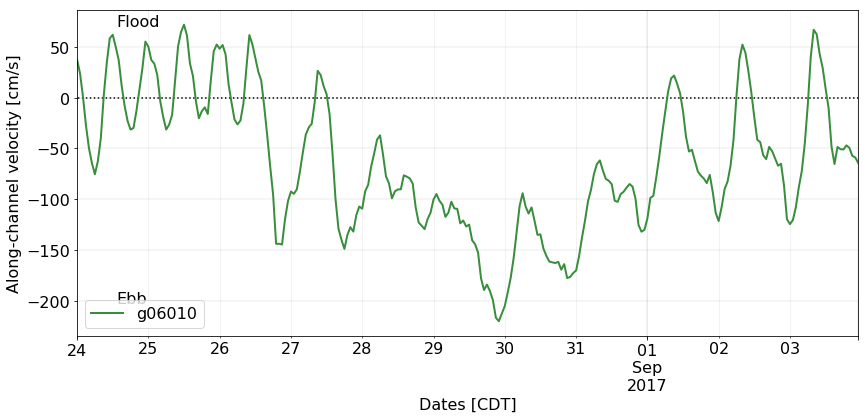

In [20]:
mpl.rcParams['font.size'] = 16
buoy = 'g06010'
df[buoy + ': Along [cm/s]']['2017-08-24':'2017-09-3'].plot(figsize=(14,6), label=buoy, 
                                                              legend=True, color=buoys[buoy ]['color'], 
                                                              lw=2, grid=True)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)
plt.hlines(0, df.index[0], df.index[-1], linestyle=':')
plt.ylabel('Along-channel velocity [cm/s]')
plt.text(0.05, 0.1, 'Ebb', transform=plt.gca().transAxes)
plt.text(0.05, 0.95, 'Flood', transform=plt.gca().transAxes)
plt.savefig('figures/along.pdf', bbox_inches='tight')

# Overall view of data locations

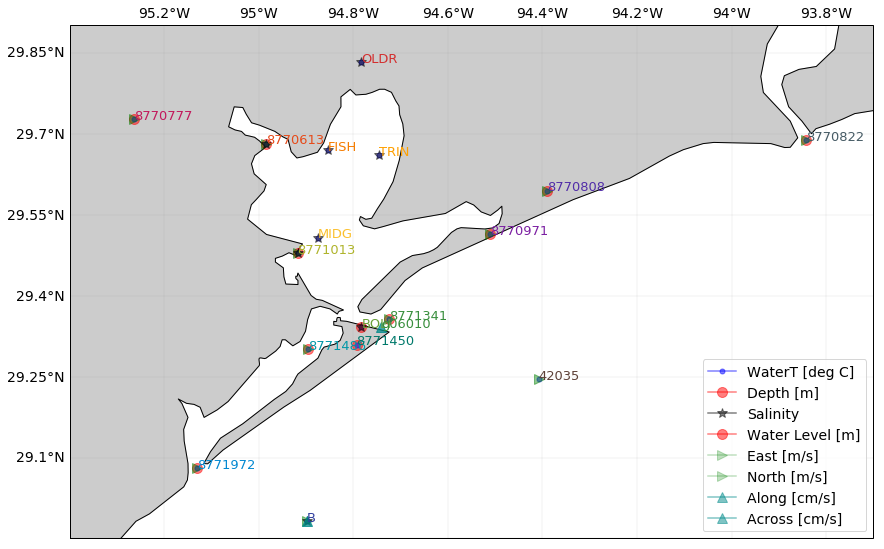

In [9]:
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.4, -93.7, 28.95, 29.9], pc)
# ax.set_extent([-95.1, -94.5, 29.25, 29.85], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'

# mappable = ax.contourf(lon, lat, bathy, cmap=cmo.deep, transform=pc)
# cb = fig.colorbar(mappable)

for buoy in buoys.keys():
    for var in buoys[buoy]['vars']:
        if var == 'AirT [deg C]':
            continue
        if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var)
    ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=13, color=buoys[buoy]['color'])

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')   
fig.savefig('figures/map.png', bbox_inches='tight', dpi=200)

## Sea Level

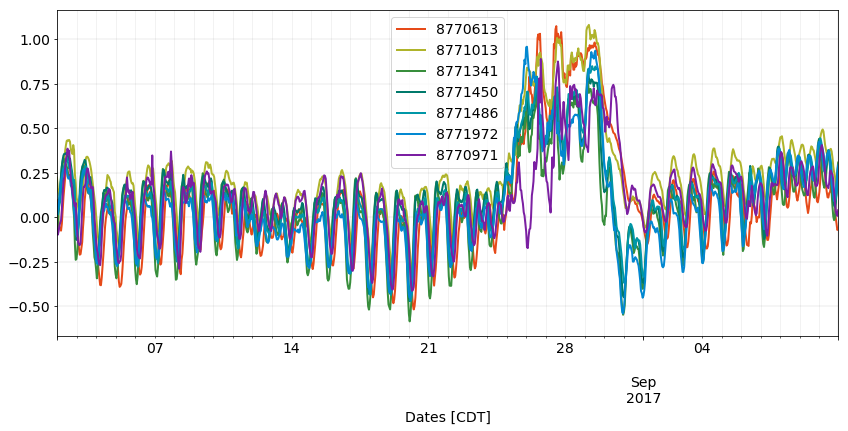

In [74]:
for buoy in buoys_ordered:
    # Exclude buoys outside the bay proper
    if buoy in ['B', '42035', '8770822', '8770777', 'OLDR', '8770808']:
        continue
    if 'Water Level [m]' in buoys[buoy]['vars']:
        df[buoy + ': Water Level [m]']['2017-08-2':'2017-09-10'].plot(figsize=(14,6), label=buoy, 
                                                                      legend=True, color=buoys[buoy]['color'], 
                                                                      lw=2, grid=True)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)
plt.savefig('figures/ssh.pdf', bbox_inches='tight')

## Salinity

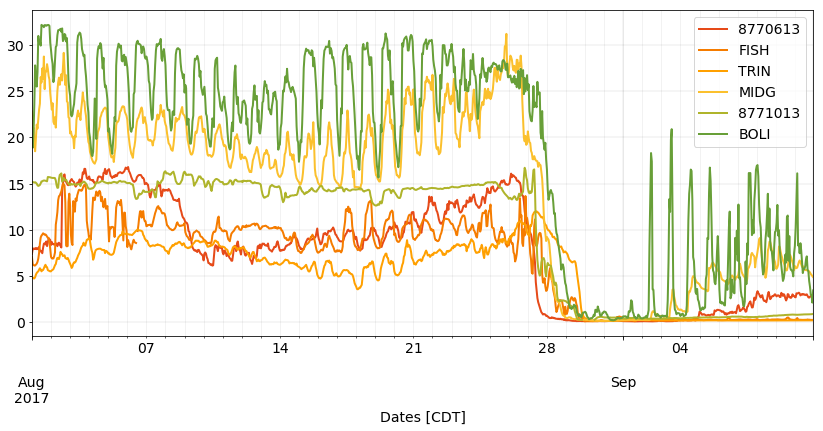

In [75]:
# Choose colors that are more distinct
for buoy in buoys_main:
    if 'Salinity' in buoys[buoy]['vars']:
        df[buoy + ': Salinity']['2017-08-1':'2017-09-10'].plot(figsize=(14,6), label=buoy, legend=True, color=buoys[buoy]['color'], lw=2)#, alpha=0.4)

plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)
plt.savefig('figures/salinity.pdf', bbox_inches='tight')

In [103]:
trin = pd.read_csv('../twdb/TRIN_seawater_salinity.csv', parse_dates=True, index_col=0, comment='#')
midg = pd.read_csv('../twdb/MIDG_seawater_salinity.csv', parse_dates=True, index_col=0, comment='#')
fish = pd.read_csv('../twdb/FISH_seawater_salinity.csv', parse_dates=True, index_col=0, comment='#')
nos = pd.read_table('8771013_2009', parse_dates=True, index_col=0, na_values=-999)
nos2 = pd.read_table('8770613_2009', parse_dates=True, index_col=0, na_values=-999)

(32, 0)

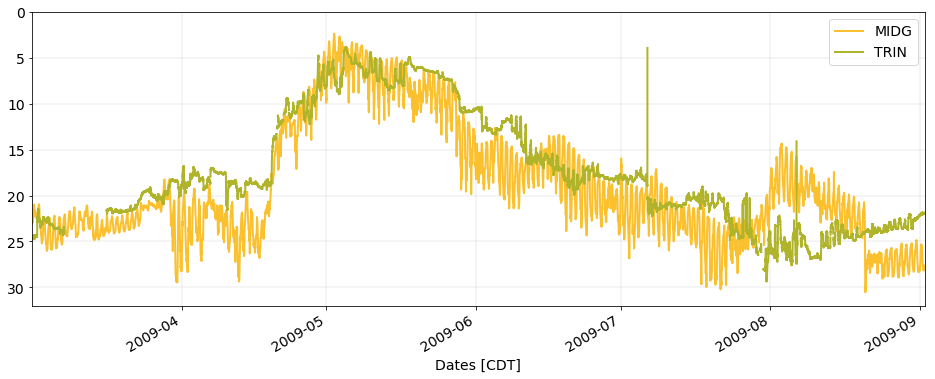

In [111]:
ax = midg['2009-03-1':'2009-9-1'].plot(figsize=(16,6), color=buoys['MIDG']['color'], lw=2)
# trin['2009-03-1':'2009-9-1'].plot(figsize=(16,6), color=buoys['TRIN']['color'], lw=2, ax=ax)
# fish['2009-03-1':'2009-9-1'].plot(figsize=(16,6), color=buoys['FISH']['color'], lw=2, ax=ax)
nos['2009-03-1':'2009-9-1'].plot(y='Salinity', figsize=(16,6), color=buoys['8771013']['color'], lw=2, ax=ax)
# nos2['2009-03-1':'2009-10-1'].plot(y='Salinity', figsize=(14,6), color=buoys['8770613']['color'], lw=2, ax=ax)
plt.grid(which='major', lw=1.5, color='k', alpha=0.05)
plt.grid(which='minor', lw=1, color='k', alpha=0.05)
plt.legend(['MIDG', 'TRIN', 'FISH', '8771013'])
plt.gca().invert_yaxis() 
plt.ylim(32,0)

## Winds

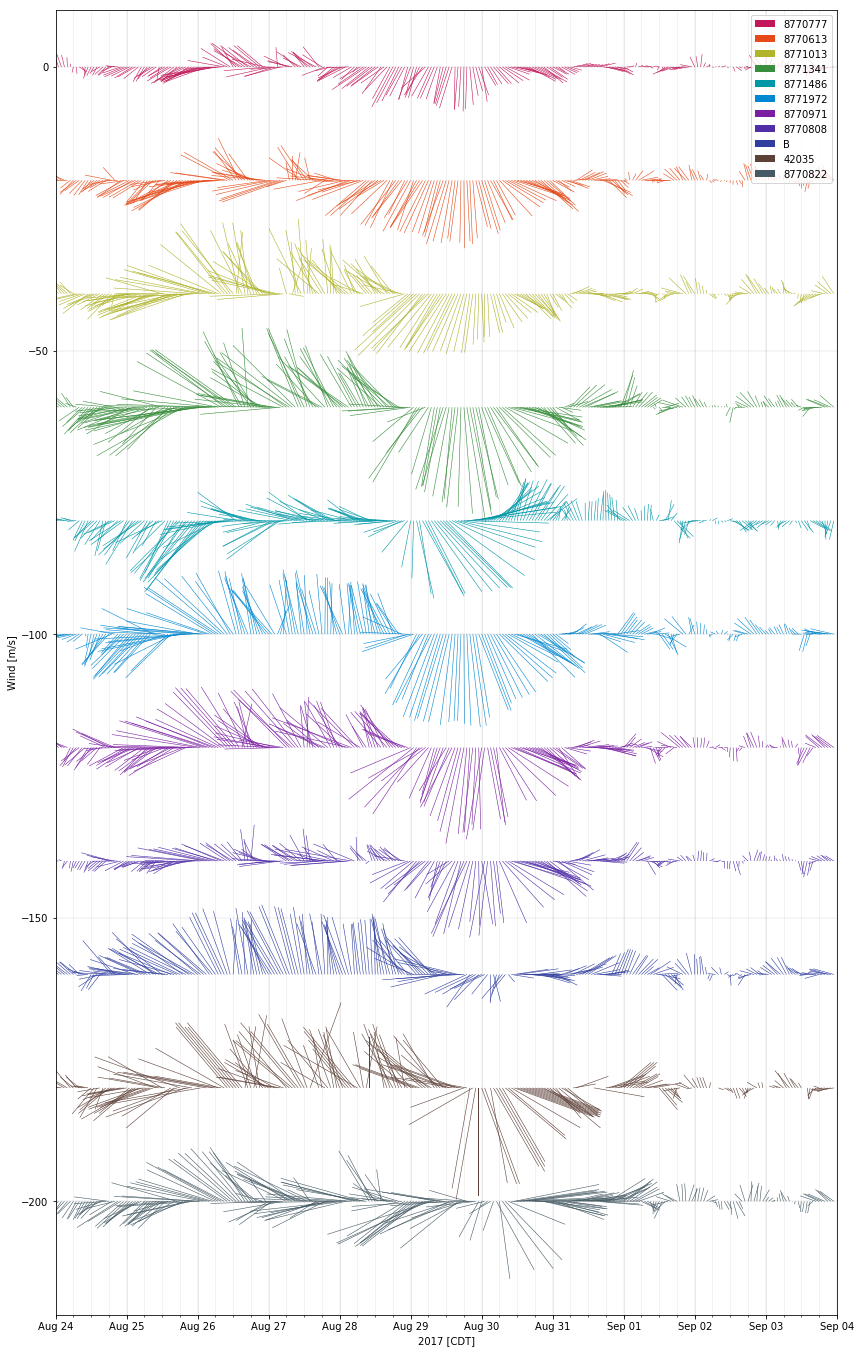

In [140]:
df['idx'] = date2num(pd.to_datetime(df.index).to_pydatetime())
ddt = 1
width=.1

fig, ax = plt.subplots(1, 1, figsize=(14,24))
ax.set_ylim(-220,10)
ax.set_xlim(df['idx'].loc['2017-08-24 00:00:00'], df['idx'].loc['2017-09-4 00:00:00'])
i = 0
for buoy in buoys_ordered:
    if 'East [m/s]' in buoys[buoy]['vars'] and not df['2017-08-24':'2017-09-3'][buoy + ': East [m/s]'].isnull().all():
        ax.quiver(df['idx'][::ddt]['2017-08-24':'2017-09-3'], np.zeros(len(df[::ddt]['2017-08-24':'2017-09-3'])) - i*20, df[::ddt]['2017-08-24':'2017-09-3'][buoy + ': East [m/s]'], df[::ddt]['2017-08-24':'2017-09-3'][buoy + ': North [m/s]'], headaxislength=0,
                  headlength=0, width=width, units='y', scale_units='y', scale=1, color=buoys[buoy]['color'], label=buoy)
        i += 1

import matplotlib as mpl
minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))
# if df.index[0].year != df.index[-1].year:
#     ax.text(0.98, -0.05, df.index.strftime("%Y")[0] + '-' + df.index.strftime("%Y")[-1],
#             transform=ax.transAxes, rotation=30)
# else:
#     ax.text(0.98, -0.15, df.index.strftime("%Y")[-1],
#             transform=ax.transAxes, rotation=30)
ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')   

ax.set_xlabel('2017 [CDT]')
ax.set_ylabel('Wind [m/s]')


# 1. Calculate channel flux from Galveston Bay

We calculate the flux through Galveston channel, $Q_{ch}$, in two ways — one directly from data and one through conservation of salinity in the bay. The first should be good over time, regardless of the salinity state, but has large error because the data is at a single $x,y,z$ location and is assumed to be uniform across the whole channel. The second is only valid when there is salinity in the bay which is not true during the major flooding event. However, we use it to reduce the error in the first method.

We assume that any outflow from the West and East bays is insignificant.

## 1a. From current meter in channel

$\begin{align}
Q_{ch} &= \iint_A U_{ch}(t) \, dA  \\
~ &\approx U_{ch} \cdot A
\end{align}$

where the integral of the along-channel velocity, $U_{ch}$, of a cross-section of Galveston channel is approximated by the along-channel velocity at buoy `g06010` times the approximate cross-sectional area, width $W$ times depth $D$. Instead of estimating the cross-sectional area of the channel, we leave this constant as a parameter to be estimated by comparing with the salinity conservation method. This parameter will include errors in the method too.

In [24]:
# negative sign because original orientation is positive into the bay
Uch = -df['g06010: Along [cm/s]']/100.  # m/s

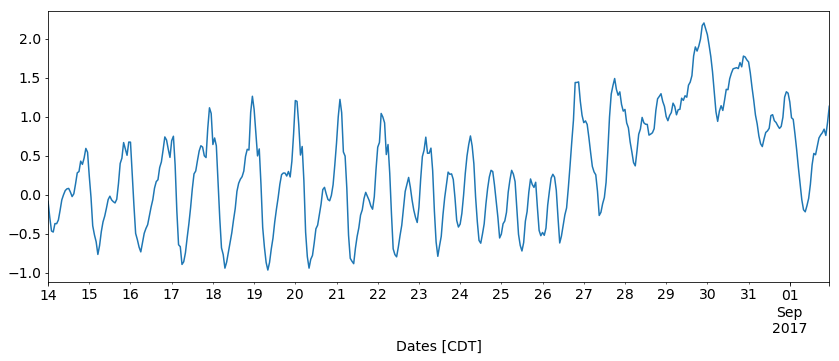

In [45]:
Uch['2017-8-14':'2017-9-1'].plot(figsize=(14,5))#, label='$Q^s_{ch}$')


## 1b. From salinity conservation

Conservation of salinity in Galveston Bay gives:

$
\begin{align}
\partial (S V)/\partial t &= S_{in}Q_{in} - S_{ch} Q_{ch} \\
\partial (S V)/\partial t &= - S_{ch} Q_{ch} \\
\Rightarrow Q_{ch} &= -\frac{1}{S_{ch}} \frac{\partial (S V)}{\partial t}
\end{align}
$

where the input salinity, $S_{in}$, is assumed to be fresh so $S_{in}=0$ and $S_{ch}$ is the channel salinity.

We have data from TWDB station BOLI to represent $S_{ch}$ but the resulting inflow calculation has a linear relationship with the salinity representation of the water in the bay, $S(t)$, so we need to treat this carefully in particular.

Rayson et al 2017 finds that the volume-averaged salinity along the bay tends to be located around 30km from the mouth of the bay, which is approximately where the TWDB MIDG station is located. This is shown in their Figure 3. Therefore, we use the MIDG station to represent the average salinity of the bay, $S(t)$.

Note that we include the main (middle part plus Trinity bay) and east bays of Galveston for the salinity conservation calculation because previous work (Powell 2003, Rayson 2015) have shown connectivity between salinity in these two areas but limited mixing with the West Bay. We will not use the West Bay of Galveston for any calculation in this work.

The derivative term is calculated as follows, where the volume is approximated as the surface area times the average depth plus a representative sea surface height:

$
\begin{align}
    \frac{\partial (S V)}{\partial t} &= A \frac{\partial [S(H+\eta)]} {\partial t}.
\end{align}
$

We calculate this term for both of the bays (main and east).

Surface area of the bay is calculated using bathymetry of Galveston Bay as calculated in `bathy` notebook.

In [25]:
# East bay surface area
d = np.load(base + 'bathy_galv_east.npz')
bathye = d['bathy']; dx = d['dx']; dy = d['dy']
Ae = np.nansum(~np.isnan(bathye)*dx*dy)

# Main bay surface area
bathym = np.load(base + 'bathy_galv_main.npz')['bathy']
Am = np.nansum(~np.isnan(bathym)*dx*dy)

# Main and East bay surface area
A = Am + Ae

# Average depth for main and East bays
H = -(np.nansum(bathye) + np.nansum(bathym))/((~np.isnan(bathye) + ~np.isnan(bathym)).sum())

In [65]:
S = df['8771013: Salinity']
Sch = df['BOLI: Salinity']

eta = df['8771013: Water Level [m]']['2017-08-4':]  # m

SV = A*S*(eta + H)
dSVdt = SV.diff()/3600.  # divide by 3600 seconds for an hour frequency

We can then calculate the pre-storm channel flux as follows from salinity conservation:

In [66]:
Qch1b = dSVdt/-Sch  # m^3/s

## Combining methods to get best $Q_{ch}$

Salinity conservation (method 1b) gives us a more robust calculation for the channel flux, but it isn't meaningful after the whole bay is fresh. Thus, we combine this with applying current data uniformly across the channel (method 1a) to get an improved estimate.

We seek a fixed constant to improve the comparison of $U_{ch}$ with Qout1b. So, we use a linear fit between the two functions over the time period before Hurricane Harvey, from July 1 through August 24th.

[ 15862.37880748   -549.13526088]


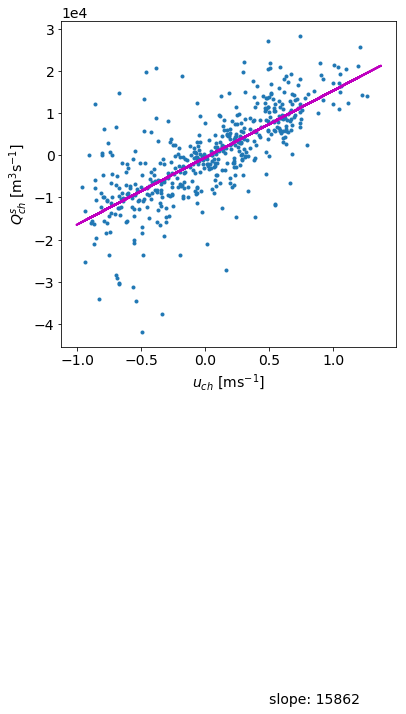

In [67]:
# Use linear fit to find relationship between measurements.
dst = '2017-7-1'
ind = (~Uch[dst:'2017-08-24'].isnull()) & (~Qch1b[dst:'2017-08-24'].isnull()).values
p = np.polyfit(Uch[dst:'2017-08-24'].loc[ind], Qch1b[dst:'2017-08-24'].loc[ind], 1)  # fit a straight line (order is 1)

# Demonstrate fit of line
plt.figure(figsize=(6,6))
plt.plot(Uch[dst:'2017-08-24'], Qch1b[dst:'2017-08-24'], '.', ms=6)
plt.plot(Uch[dst:'2017-08-24'], np.polyval(p, Uch[dst:'2017-08-24']), 'm', lw=2)
plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.xlabel('$u_{ch}$ [ms$^{-1}$]')
plt.ylabel('$Q^s_{ch}$ [m$^3$s$^{-1}$]')
plt.text(0.5, -130000, 'slope: %3d' % p[0])
plt.savefig('figures/linear_regression_Qch.pdf', bbox_inches='tight')
print(p)

The improved channel flux is the the data-based method (1a) times the slope of the fit between the two methods. The constant factor (p[0]) represents the cross-sectional area of the channel at the location of the current meter times an error factor accounting for the fact that the channel flow is not uniform across the channel nor with depth.

Note that since the p[0] accounts for both channel area and an error factor, its units are m$^2$.

In [68]:
# this is now the improved flux calculation which applies during the storm too
Qch = Uch*p[0]  # m^3/s

With this adjustment, the two approaches align well before the storm, as seen in the figure below. The salinity conservation approach (method 1b) does not give reasonable results once the bay is too fresh (around August 28th).

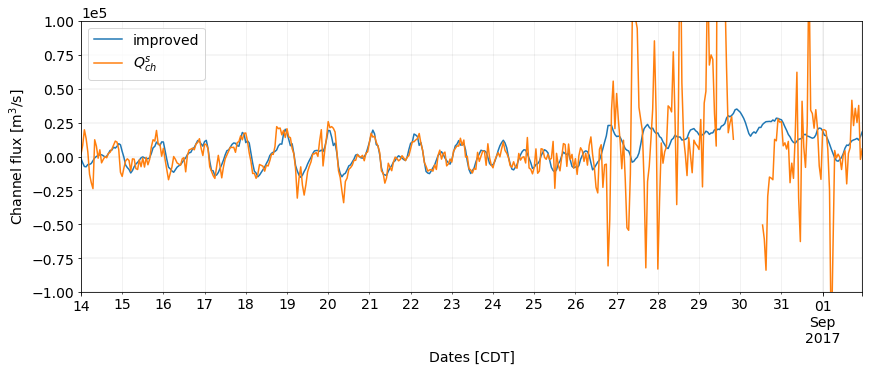

In [69]:
ax = Qch['2017-8-14':'2017-9-1'].plot(label='improved')
Qch1b['2017-8-14':'2017-9-1'].plot(ax=ax, figsize=(14,5), label='$Q^s_{ch}$')
ax.legend()
ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
ax.grid(which='minor', lw=1, color='k', alpha=0.05)
ax.set_ylabel('Channel flux [m$^3$/s]')
ax.set_ylim(-1e5, 1e5)
ax.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.savefig('figures/channel_flux_improved.pdf', bbox_inches='tight')

This number is the equivalent area of the channel cross-section — it is the area times a factor to account for errors in assuming a constant along-channel velocity across the channel and with depth.

The cross-sectional area is approximately:

In [70]:
W = 2500  # meters, calculated with length tool in google earth

D = (250*22 + 325*34 + 1050*45 + 425*35 + 50*24 + 100*17 + 300*1)/2500  # feet
D /= 3.28084  # meters
W*D  # m^2

24955.499201424027

In [71]:
25000/25000

1.0

meaning that the equivalent area is

In [72]:
p[0]/(W*D)

0.63562658792960869

times the area of the channel there and therefore is in the right ballpark.

# 2. Calculate inflow to Galveston Bay

For this we use a control volume of Galveston Bay with the previously-calculated function for $Q_{ch}$

$\begin{align}
\partial V/\partial t &= Q_{in} - Q_{ch} ~~~~~~~~(1) \\
\Rightarrow Q_{in}(t) &= Q_{ch}(t) + \partial V/\partial t
\end{align}$

where $V(t)$ is the volume of Galveston Bay, $Q_{in}(t)$ is the water input to Galveston Bay, and $Q_{ch}(t)$ is the flux in Galveston Bay channel.

## 2a. Calculate volume of bay in time

Assuming that any change in x/y area of the bay due to flooding is limited, we have the following:

$\begin{align}
\partial V/\partial t &= \partial /\partial t \left(\iiint dxdydz\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy + \iint \int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint \int_{z=h}^{0} dzdxdy\right) + \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) \\
~ &= \partial /\partial t \left(\iint\int_{z=0}^{\eta} dzdxdy\right) \\
~ &= A \partial /\partial t \int_{z=0}^{\eta} dz \\
~ &= A \partial \eta/\partial t
\end{align}$

We use the sea level at station 8771013 in the middle of the main bay to represent the sea level in both the main and east bays.

In [33]:
# sea level at buoy 8771013 for main bay
detamdt = df['8771013: Water Level [m]'].diff()/3600.  # divide by 3600 seconds for an hour frequency
dVdt = Am * detamdt

# sea level at buoy 8771013 for east bay also
detaedt = df['8771013: Water Level [m]'].diff()/3600.  # divide by 3600 seconds for an hour frequency
dVedt = Ae * detaedt

## $Q_{in}$

Now we can make the final calculation.

In [34]:
Qin = Qch + dVdt + dVedt

The influx of water looks reasonable during the storm, as seen in the figure below.

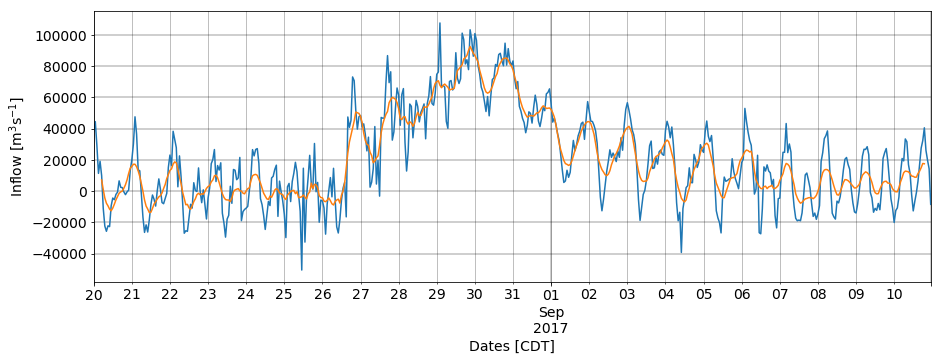

In [39]:
Qin['2017-8-20':'2017-9-10'].plot(figsize=(15,5), grid=True)
(Qin['2017-8-20':'2017-9-10'].rolling(center=True, window=10).mean()).plot(figsize=(15,5), grid=True)
# Qch['2017-8-20':'2017-9-10'].plot(grid=True)
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
plt.ylabel('Inflow [m$^3$s$^{-1}$]')
plt.savefig('figures/Qin.pdf', bbox_inches='tight')

In [153]:
# # Qin['2017-8-20':'2017-9-10'].plot(figsize=(15,5), grid=True)
# (Qin.rolling(center=True, window=100).mean())['2017-8-10':'2017-9-10'].plot(figsize=(15,5), grid=True)
# # Qch['2017-8-20':'2017-9-10'].plot(grid=True)
# plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
# plt.grid(which='minor', lw=1, color='k', alpha=0.25)
# plt.ylim(-1000, 5000)

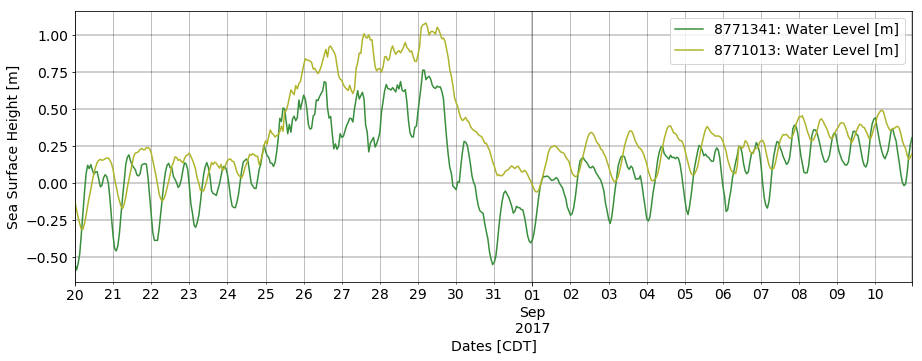

In [43]:
df['8771341: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5), legend=True, color=buoys['8771341']['color'])
df['8771013: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5), legend=True, color=buoys['8771013']['color'])
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
plt.ylabel('Sea Surface Height [m]')
plt.savefig('figures/etas.pdf', bbox_inches='tight')

COMPARE WITH MISSISSIPPI LEVEL FLOW

### Calculate linear trends in  $Q_{in}$

The cumulative sum, $V_{incum}$, shows a large influx due to the precipitation and flooding (figure below). However, it also shows a lower level influx trend before and after the storm. This is probably indicative of normal inflow to the bay from the watershed and Trinity river.

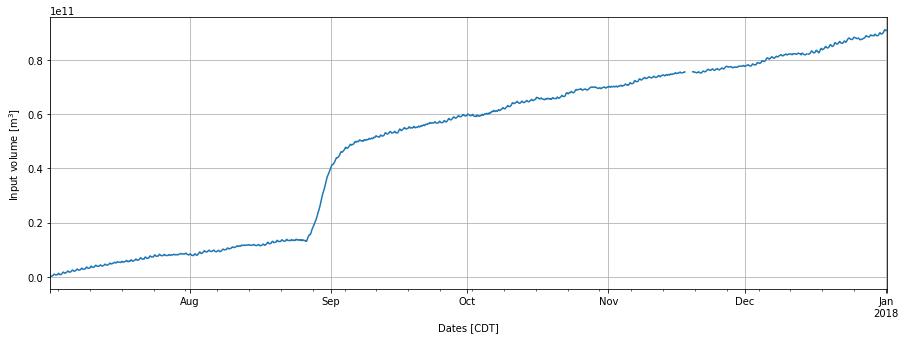

In [155]:
Vincum = Qin.cumsum()*3600  # multiply by time for integration, m^3
ax = Vincum.plot(figsize=(15,5), grid=True)
ax.set_ylabel('Input volume [m$^3$]')

We detrend the cumulative sum of $Q_{in}$, $V_{incum}$, for the time period before the storm, from August 1st through August 24th, again using a linear polynomial fit for just that time period.

In [156]:
# need to get datetime numbers instead of dates to use in the fit function
idx = date2num(pd.to_datetime(Vincum['2017-8-1':'2017-08-26 15:00'].index).to_pydatetime())
# remove nan's in data which mess up fit
ind = ~Vincum['2017-8-1':'2017-08-26 15:00'].isnull()
p1 = np.polyfit(idx[ind], Vincum['2017-8-1':'2017-08-26 15:00'].loc[ind], 1)  # fit a straight line (order is 1)

Remove the linear trend from the cumulative sum by subtracting the fit from the function:

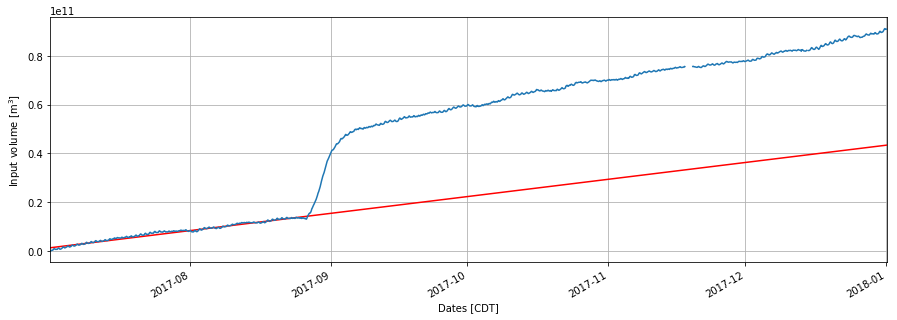

In [157]:
idx = date2num(pd.to_datetime(Vincum.index).to_pydatetime())
plt.plot(Vincum.index, p1[0]*idx + p1[1], 'r')
Vincum.plot(figsize=(15,5), grid=True)
plt.ylabel('Input volume [m$^3$]')

#### Interpretation of pre-storm slope

The input volume from August 1 through August 26th at 15:00 represents an input flow rate of

COME BACK TO THIS CHECK UNITS

In [158]:
p1[0]/86400  # m^3/s

2646.7582880732557

#### Comparison with watershed input calculation

TO DO — waiting to hear back from Nelun Fernando at TWDB for possible collaboration.

### Detrend after the main flooding: short term

The input volume increases at a different rate after the major flooding event.

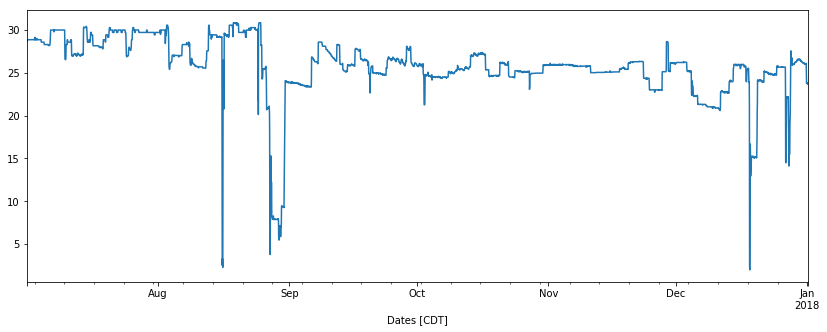

In [159]:
df['Trinity flow rate [m^3/s]'].plot(figsize=(14,5))

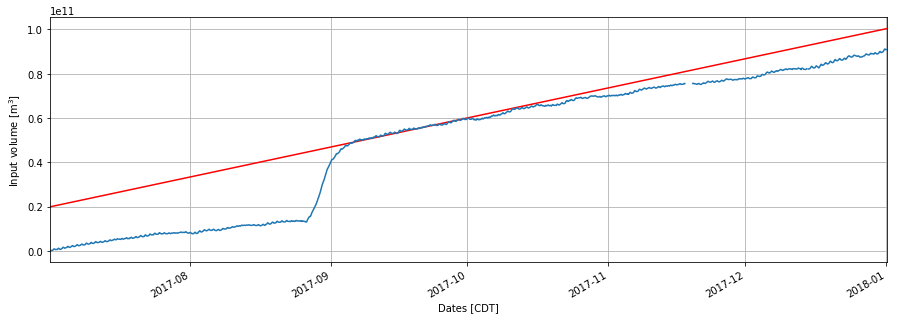

In [160]:
# need to get datetime numbers instead of dates to use in the fit function
idx = date2num(pd.to_datetime(Vincum['2017-9-3':'2017-10-1 00:00'].index).to_pydatetime())
# remove nan's in data which mess up fit
ind = ~Vincum['2017-9-3':'2017-10-1 00:00'].isnull()
p2 = np.polyfit(idx[ind], Vincum['2017-9-3':'2017-10-1 00:00'].loc[ind], 1)  # fit a straight line (order is 1)

idx = date2num(pd.to_datetime(Vincum.index).to_pydatetime())
plt.plot(Vincum.index, p2[0]*idx + p2[1], 'r')
Vincum.plot(figsize=(15,5), grid=True)
plt.ylabel('Input volume [m$^3$]')

#### Interpretation of pre-storm slope

The input volume from September 3rd to October 1st represents an input flow rate of

In [161]:
p2[0]/86400  # m^3/s

5059.9146407595881

#### Comparison with watershed input calculation

TO DO — waiting to hear back from Nelun Fernando at TWDB for possible collaboration.

### Detrend after the main flooding: long term

The input volume increases at a different rate after the major flooding event.

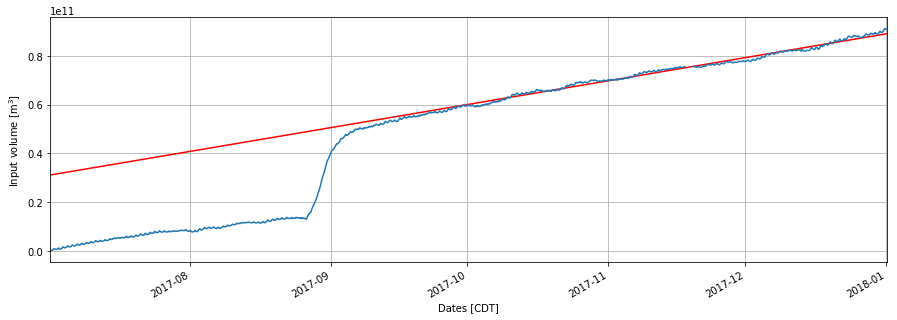

In [162]:
# need to get datetime numbers instead of dates to use in the fit function
idx = date2num(pd.to_datetime(Vincum['2017-10-1 1:00':'2017-12-31'].index).to_pydatetime())
# remove nan's in data which mess up fit
ind = ~Vincum['2017-10-1 1:00':'2017-12-31'].isnull()
p3 = np.polyfit(idx[ind], Vincum['2017-10-1 1:00':'2017-12-31'].loc[ind], 1)  # fit a straight line (order is 1)

idx = date2num(pd.to_datetime(Vincum.index).to_pydatetime())
plt.plot(Vincum.index, p3[0]*idx + p3[1], 'r')
Vincum.plot(figsize=(15,5), grid=True)
plt.ylabel('Input volume [m$^3$]')

#### Interpretation of pre-storm slope

The input volume from September 3rd through November 1st represents an input flow rate of

In [163]:
p3[0]/86400  # m^3/s

3643.5398848174918

# Volume input to bay

We compare the time periods to decide what flooding time period to average over (below). 

Based on this, we define the flooding time period to be from 2017-8-26 16:00 through 2017-9-2.

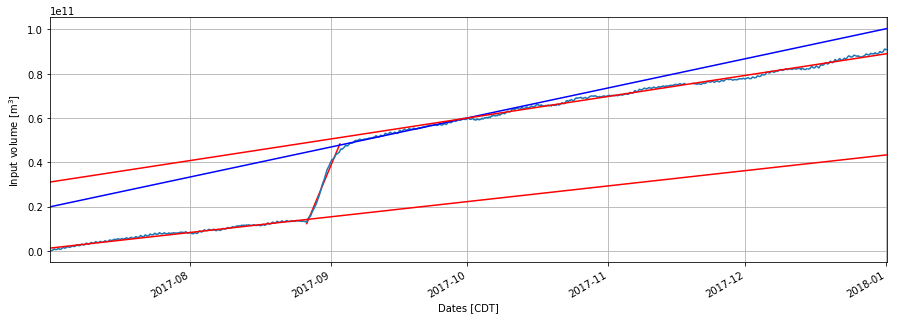

In [164]:
# need to get datetime numbers instead of dates to use in the fit function
dst = '2017-8-26 16:00'; den = '2017-9-2'
idx = date2num(pd.to_datetime(Vincum[dst:den].index).to_pydatetime())
# remove nan's in data which mess up fit
ind = ~Vincum[dst:den].isnull()
p = np.polyfit(idx[ind], Vincum[dst:den].loc[ind], 1)  # fit a straight line (order is 1)

idx = date2num(pd.to_datetime(Vincum[dst:den].index).to_pydatetime())
plt.plot(Vincum[dst:den].index, p[0]*idx + p[1], 'r')
Vincum.plot(figsize=(15,5), grid=True)
plt.ylabel('Input volume [m$^3$]')

# other lines
idx = date2num(pd.to_datetime(Vincum.index).to_pydatetime())
plt.plot(Vincum.index, p1[0]*idx + p1[1], 'r')
plt.plot(Vincum.index, p2[0]*idx + p2[1], 'b')
plt.plot(Vincum.index, p3[0]*idx + p3[1], 'r')

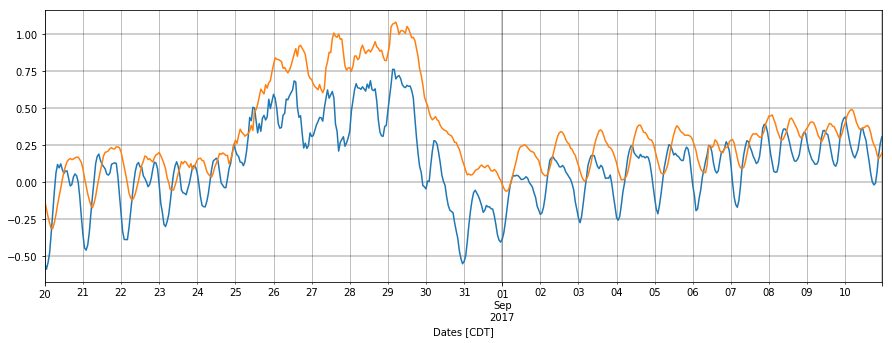

In [165]:
df['8771341: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5))
df['8771013: Water Level [m]']['2017-8-20':'2017-9-10'].plot(figsize=(15,5))
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
# dst = '2017-8-26 16:00'; den = '2017-9-2'


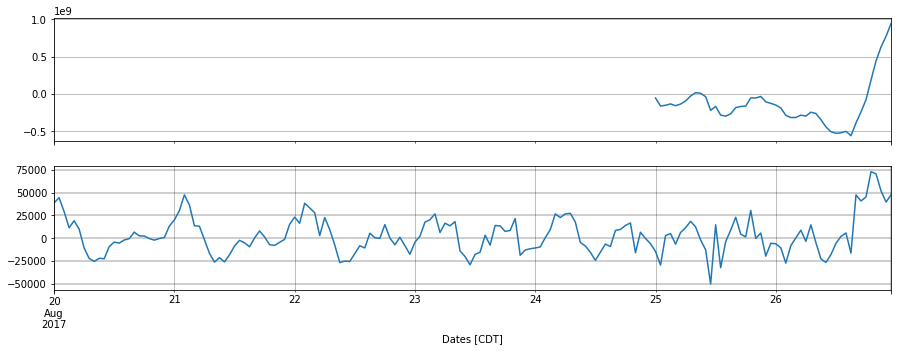

In [166]:
fig, ax = plt.subplots(2,1, sharex=True)
Vincum2 = (Qin['2017-8-25':]*3600).cumsum()
Vincum2['2017-8-20':'2017-8-26'].plot(figsize=(15,5), grid=True, ax=ax[0])
Qin['2017-8-20':'2017-8-26'].plot(figsize=(15,5), grid=True, ax=ax[1])
plt.grid(which='major', lw=1.5, color='k', alpha=0.25)
plt.grid(which='minor', lw=1, color='k', alpha=0.25)
# plt.ylim(0,1e8)

In [167]:
Qin['2017-8-25']

Dates [CDT]
2017-08-25 00:00:00   -14710.165331
2017-08-25 01:00:00   -29721.882505
2017-08-25 02:00:00     2790.871945
2017-08-25 03:00:00     4960.149889
2017-08-25 04:00:00    -6664.856733
2017-08-25 05:00:00     6167.904596
2017-08-25 06:00:00    11427.096973
2017-08-25 07:00:00    18459.589933
2017-08-25 08:00:00    12312.223047
2017-08-25 09:00:00    -2049.177974
2017-08-25 10:00:00   -12850.290783
2017-08-25 11:00:00   -50485.652932
2017-08-25 12:00:00    14691.291937
2017-08-25 13:00:00   -32605.184814
2017-08-25 14:00:00    -3809.995195
2017-08-25 15:00:00     8703.825528
2017-08-25 16:00:00    22939.607492
2017-08-25 17:00:00     4411.939498
2017-08-25 18:00:00     1292.025789
2017-08-25 19:00:00    30519.978245
2017-08-25 20:00:00     -386.913148
2017-08-25 21:00:00     5592.495677
2017-08-25 22:00:00   -19857.941816
2017-08-25 23:00:00    -5694.735806
dtype: float64

This gives a total input flow of:

In [168]:
Vin = (Vincum['2017-9-2 23:00'] - Vincum['2017-8-24 16:00'])/1000**3  # km^3
print(Vin)

31.5835055175


## Compare with volume of Galveston Bay

Average depth of Galveston Bay:

In [169]:
# Galveston Bay volume (main and east bays)
Vgb = (A*H)/1000**3  # km^3
print(Vgb)

3.59596263991


For reference, the west bay surface area and volume are (which are not used in the calculations):

In [170]:
# west bay surface area
bathyw = np.load(base + 'bathy_galv_west.npz')['bathy']
Aw = np.nansum(~np.isnan(bathyw)*dx*dy)
# Average depth for main and East bays
Hw = -(np.nansum(bathyw))/((~np.isnan(bathyw)).sum())
print(Aw/1000**3, (Aw*Hw)/1000**3)  # km^2, km^3

0.316747003901 0.434187065515


This means that the flood water could fill the bay approximately:

In [171]:
Vin/Vgb

8.7830460658686889

times.

## Compare with watershed calculation for during flooding

TODO

## Compare with the precipitation estimates over Texas

## Compare our choice of timing for integrating flood waters with other sources

In [172]:
infg = pd.read_csv('drive_data/daily_gauged_galv_1Aug_30Sep2017.csv', parse_dates=True, index_col=0)['sum_afd']
convert = 0.0142764  # 1 acre-foot per day = 0.0142764 m^3/s
infg *= convert
infug = pd.read_csv('drive_data/fresh_in_modelled_galv_1aug2017_to_30sep2017.txt', parse_dates=True, index_col=0, skiprows=1, header=None, names=['Dates', 'ungauged'])
infug *= convert
# infug
inf = infug['ungauged'] + infg
inf

2017-08-01       90.586899
2017-08-02      144.919736
2017-08-03      244.809709
2017-08-04      381.687120
2017-08-05      319.359356
2017-08-06      330.329199
2017-08-07      491.894647
2017-08-08     1867.833806
2017-08-09     2194.356632
2017-08-10     1513.400191
2017-08-11      809.986544
2017-08-12      482.101608
2017-08-13      312.232434
2017-08-14      232.564126
2017-08-15      194.317651
2017-08-16      177.163414
2017-08-17      167.245313
2017-08-18      167.506286
2017-08-19      187.773206
2017-08-20      195.360827
2017-08-21      215.188605
2017-08-22      191.517906
2017-08-23      177.435094
2017-08-24       27.499059
2017-08-25      412.177514
2017-08-26     2290.530457
2017-08-27    12040.901781
2017-08-28    28662.698157
2017-08-29    39421.901437
2017-08-30    32557.943657
                  ...     
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
N

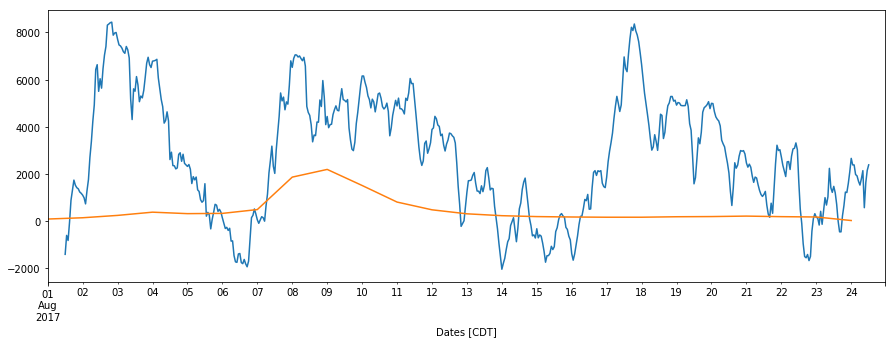

In [173]:
(Qin['2017-8-1':'2017-8-24'].rolling(center=True, window=24).mean()).plot(figsize=(15,5), grid=True)
inf['2017-8-1':'2017-8-24'].plot()

In [174]:
(Qin['2017-8-1':'2017-8-24']*3600).sum()/1000**3

5.300756575021801

In [175]:
(Vincum.loc['2017-8-24 23:00'] - Vincum.loc['2017-8-1 00:00'])/1000**3

5.2778031158535432

In [176]:
(inf['2017-8-1':'2017-8-24']*86400).sum()/1000**3

0.9605147935980671